In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
#Total Folder: group-data-by-boro
group_data = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [3]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,214682.0,29930.0,8078.0,8386.33,1169.18,315.56,143077.0,21862.0,...,8166.0,9525.84,1349.60,362.31,57942.0,5488.0,1525.0,12169.03,1152.59,320.28
1,Age,0-4,5182.0,232.0,NaN,2832.84,126.83,NaN,3273.0,169.0,...,NaN,3172.25,107.22,NaN,1324.0,32.0,NaN,4840.24,116.98,NaN
2,Age,5-12,11393.0,142.0,NaN,4521.47,56.35,NaN,7232.0,95.0,...,NaN,4825.47,41.85,NaN,3149.0,15.0,NaN,6882.32,32.78,NaN
3,Age,13-17,8520.0,150.0,NaN,6078.69,107.02,NaN,5299.0,121.0,...,NaN,6417.69,99.31,NaN,2866.0,28.0,NaN,9596.19,93.75,NaN
4,Age,0-17,NaN,NaN,8.0,NaN,NaN,1.39,NaN,NaN,...,5.0,NaN,NaN,1.12,NaN,NaN,2.0,NaN,NaN,1.94


Checking which columns have missing values and what rows I will keep

In [4]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  18 non-null     object 
 1   subgroup               18 non-null     object 
 2   BK_CASE_COUNT          17 non-null     float64
 3   BK_HOSPITALIZED_COUNT  17 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           17 non-null     float64
 6   BK_HOSPITALIZED_RATE   17 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          17 non-null     float64
 9   BX_HOSPITALIZED_COUNT  17 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           17 non-null     float64
 12  BX_HOSPITALIZED_RATE   17 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          17 non-null     float64
 15  MN_HOSPI

### Filling in missing values and creating new columns

I intent to keep the category 0-17 but since it has a lot of missing values, I will find them in by adding the rows above. For example: For 'BK_CASE_COUNT' 0-17 na row, I will add rows: 0-4,5-12 and 13-17. 

In [5]:
group_data = group_data.fillna((group_data[group_data['group']=='Age'][:3].sum()))

In [6]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,214682.0,29930.0,8078.0,8386.33,1169.18,315.56,143077.0,21862.0,...,8166.0,9525.84,1349.60,362.31,57942.0,5488.0,1525.0,12169.03,1152.59,320.28
1,Age,0-4,5182.0,232.0,0.0,2832.84,126.83,0.00,3273.0,169.0,...,0.0,3172.25,107.22,0.00,1324.0,32.0,0.0,4840.24,116.98,0.00
2,Age,5-12,11393.0,142.0,0.0,4521.47,56.35,0.00,7232.0,95.0,...,0.0,4825.47,41.85,0.00,3149.0,15.0,0.0,6882.32,32.78,0.00
3,Age,13-17,8520.0,150.0,0.0,6078.69,107.02,0.00,5299.0,121.0,...,0.0,6417.69,99.31,0.00,2866.0,28.0,0.0,9596.19,93.75,0.00
4,Age,0-17,25095.0,524.0,8.0,13433.00,290.20,1.39,15804.0,385.0,...,5.0,14415.41,248.38,1.12,7339.0,75.0,2.0,21318.75,243.51,1.94


Now that the row 0-17 is full, I will drop the repeated categories(0-4,5-12 and 13-17) as well as the columns I won't be using

In [7]:
group_data.drop([1,2,3],inplace=True)

In [8]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  15 non-null     object 
 1   subgroup               15 non-null     object 
 2   BK_CASE_COUNT          15 non-null     float64
 3   BK_HOSPITALIZED_COUNT  15 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           15 non-null     float64
 6   BK_HOSPITALIZED_RATE   15 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          15 non-null     float64
 9   BX_HOSPITALIZED_COUNT  15 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           15 non-null     float64
 12  BX_HOSPITALIZED_RATE   15 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          15 non-null     float64
 15  MN_HOSPI

In [9]:
for col in group_data.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        group_data = group_data.drop(col, axis=1)

In [10]:
group_data = group_data[group_data['group']=='Age']

In [11]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,25095.0,8.0,15804.0,6.0,8754.0,2.0,21170.0,5.0,7339.0,2.0
5,Age,18-24,19504.0,19.0,12854.0,8.0,10836.0,3.0,18195.0,7.0,6241.0,5.0
6,Age,25-34,40208.0,72.0,25218.0,61.0,22937.0,21.0,38043.0,71.0,9925.0,12.0
7,Age,35-44,33351.0,167.0,22272.0,158.0,15128.0,59.0,35202.0,229.0,8850.0,33.0
8,Age,45-54,29775.0,501.0,22779.0,382.0,13435.0,151.0,35269.0,522.0,9163.0,90.0
9,Age,55-64,29572.0,1168.0,21681.0,936.0,13339.0,397.0,33200.0,1365.0,8427.0,182.0
10,Age,65-74,20633.0,2015.0,12630.0,1379.0,9014.0,784.0,19010.0,2018.0,4538.0,358.0
11,Age,75+,16348.0,4128.0,9634.0,2442.0,8951.0,2162.0,14476.0,3949.0,3441.0,843.0


In [12]:
group_data["BK_FATALITY_RATE"] =  group_data["BK_DEATH_COUNT"]/group_data["BK_CASE_COUNT"]

In [13]:
group_data["BX_FATALITY_RATE"] =  group_data["BX_DEATH_COUNT"]/group_data["BX_CASE_COUNT"]

In [14]:
group_data["MN_FATALITY_RATE"] =  group_data["MN_DEATH_COUNT"]/group_data["MN_CASE_COUNT"]

In [15]:
group_data["QN_FATALITY_RATE"] =  group_data["QN_DEATH_COUNT"]/group_data["QN_CASE_COUNT"]

In [16]:
group_data["SI_FATALITY_RATE"] =  group_data["SI_DEATH_COUNT"]/group_data["SI_CASE_COUNT"]

In [17]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,Age,0-17,25095.0,8.0,15804.0,6.0,8754.0,2.0,21170.0,5.0,7339.0,2.0,0.000319,0.000380,0.000228,0.000236,0.000273
5,Age,18-24,19504.0,19.0,12854.0,8.0,10836.0,3.0,18195.0,7.0,6241.0,5.0,0.000974,0.000622,0.000277,0.000385,0.000801
6,Age,25-34,40208.0,72.0,25218.0,61.0,22937.0,21.0,38043.0,71.0,9925.0,12.0,0.001791,0.002419,0.000916,0.001866,0.001209
7,Age,35-44,33351.0,167.0,22272.0,158.0,15128.0,59.0,35202.0,229.0,8850.0,33.0,0.005007,0.007094,0.003900,0.006505,0.003729
8,Age,45-54,29775.0,501.0,22779.0,382.0,13435.0,151.0,35269.0,522.0,9163.0,90.0,0.016826,0.016770,0.011239,0.014801,0.009822
9,Age,55-64,29572.0,1168.0,21681.0,936.0,13339.0,397.0,33200.0,1365.0,8427.0,182.0,0.039497,0.043171,0.029762,0.041114,0.021597
10,Age,65-74,20633.0,2015.0,12630.0,1379.0,9014.0,784.0,19010.0,2018.0,4538.0,358.0,0.097659,0.109184,0.086976,0.106155,0.078889
11,Age,75+,16348.0,4128.0,9634.0,2442.0,8951.0,2162.0,14476.0,3949.0,3441.0,843.0,0.252508,0.253477,0.241537,0.272796,0.244987


### Graphing
#### Now that I have all the data I will need for Diagram #2 (The infection: # of cases for each borough and the fatality rate for each borough. I will start plotting. 

In [18]:
x = group_data["subgroup"]

In [19]:
y1 = group_data.iloc[:,2:12:2]
y2 = group_data.iloc[:, 12:]

In [23]:
y1

,BK_CASE_COUNT,BX_CASE_COUNT,MN_CASE_COUNT,QN_CASE_COUNT,SI_CASE_COUNT
4,25095.0,15804.0,8754.0,21170.0,7339.0
5,19504.0,12854.0,10836.0,18195.0,6241.0
6,40208.0,25218.0,22937.0,38043.0,9925.0
7,33351.0,22272.0,15128.0,35202.0,8850.0
8,29775.0,22779.0,13435.0,35269.0,9163.0
9,29572.0,21681.0,13339.0,33200.0,8427.0
10,20633.0,12630.0,9014.0,19010.0,4538.0
11,16348.0,9634.0,8951.0,14476.0,3441.0


In [24]:
y2

,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0.000319,0.000380,0.000228,0.000236,0.000273
5,0.000974,0.000622,0.000277,0.000385,0.000801
6,0.001791,0.002419,0.000916,0.001866,0.001209
7,0.005007,0.007094,0.003900,0.006505,0.003729
8,0.016826,0.016770,0.011239,0.014801,0.009822
9,0.039497,0.043171,0.029762,0.041114,0.021597
10,0.097659,0.109184,0.086976,0.106155,0.078889
11,0.252508,0.253477,0.241537,0.272796,0.244987


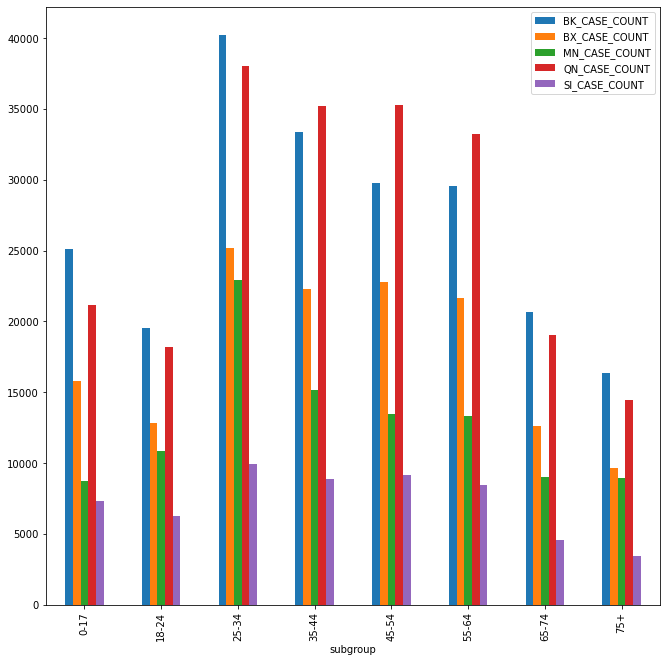

In [25]:
group_data.groupby('subgroup')[['BK_CASE_COUNT','BX_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT']].sum().plot(kind='bar', figsize= (11,11))

In [28]:
borough_fatality = 'BK_FATALITY_RATE'

In [29]:
group_data[["subgroup","BK_CASE_COUNT", "BK_FATALITY_RATE" ]]

,subgroup,BK_CASE_COUNT,BK_FATALITY_RATE
4,0-17,25095.0,0.000319
5,18-24,19504.0,0.000974
6,25-34,40208.0,0.001791
7,35-44,33351.0,0.005007
8,45-54,29775.0,0.016826
9,55-64,29572.0,0.039497
10,65-74,20633.0,0.097659
11,75+,16348.0,0.252508


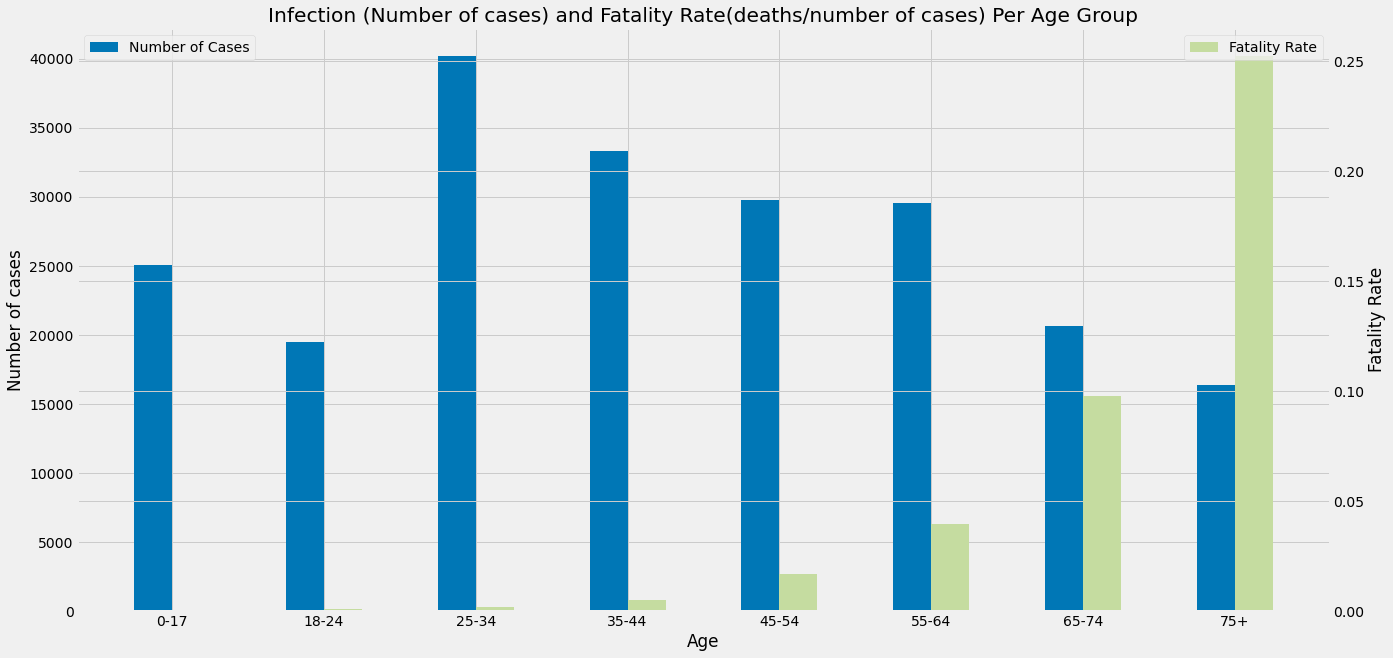

In [59]:
%matplotlib inline

borough_filter = 'BK_CASE_COUNT'
borough_fatality_filter = 'BK_FATALITY_RATE'

width = 0.25
labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
data1 = group_data.groupby('subgroup')[borough_filter].sum()
data2 = group_data.groupby('subgroup')[borough_fatality_filter].sum()
x = np.arange(len(labels))

plt.style.use('fivethirtyeight')
fig, ax1= plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.bar(x-width/2, data1, width=width,label='Number of Cases', color='#0077B6')
ax2.bar(x+width/2, data2,width=width,label='Fatality Rate',color= '#C5DCA0')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of cases')
ax2.set_ylabel('Fatality Rate')
ax1.set_title('Infection (Number of cases) and Fatality Rate(deaths/number of cases) Per Age Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

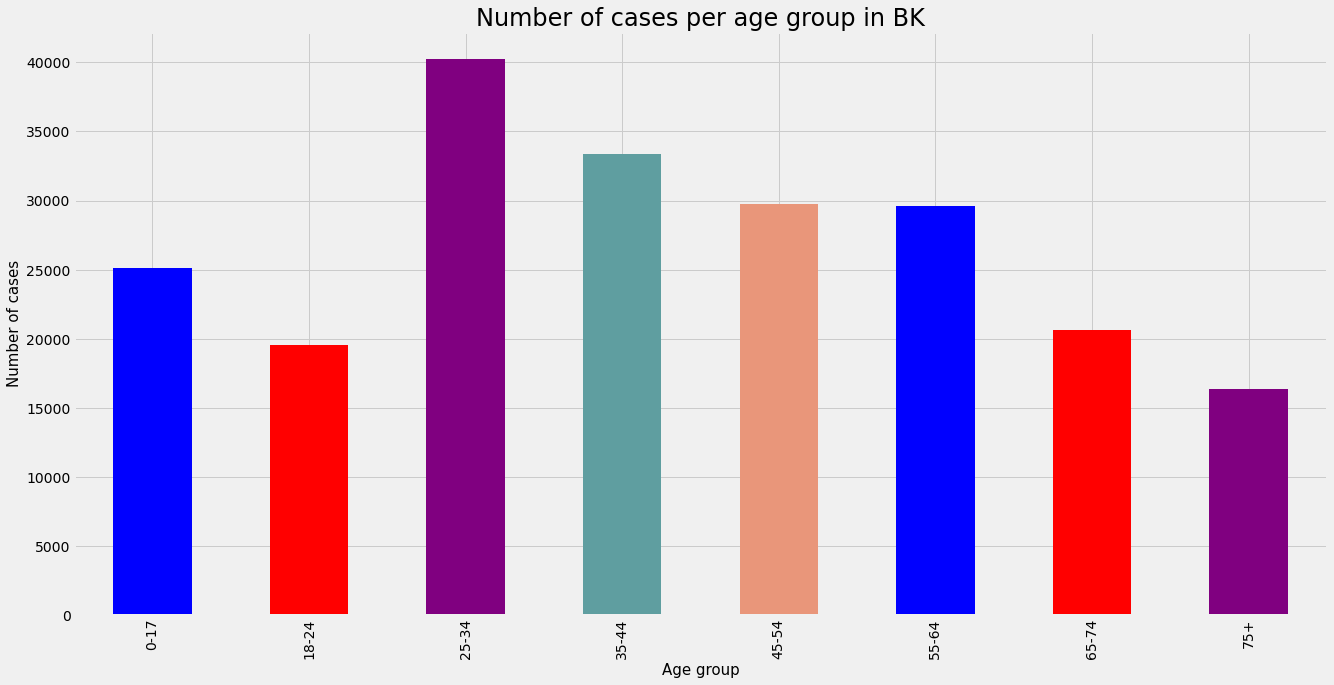

In [30]:
from matplotlib import style

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
group_data.groupby('subgroup')[borough].sum().plot(kind='bar',color=color)
ax.set_title(f'Number of cases per age group in {borough[:2]}',size=24)
ax.set_xlabel('Age group',size=15)
ax.set_ylabel('Number of cases', size=15)
plt.show()

In [ ]:
#Trends Folder: data by day
data_day =pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv")

In [ ]:
data_day

In [ ]:
data_day.info()

In [ ]:
#Totals Folder: by_boro
totals_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/by-boro.csv")

In [ ]:
totals_boro